# Behavioral Data Science Portfolio - Large Behavioral Health Organization
## Complete Analysis: Retention + NLP Culture Insights

**Overview:**
- Project 1: Retention & Engagement Dashboard
- Project 2: Feedback & Culture Insights (NLP + Sentiment)

**Data Sources:**
- HRIS: Report 10.3.25.xlsx
- Engagement: Workplace Experience CSV files
- Survey Comments: 5 .xlsx files (Jan 2022 - May 2025)
- Exit Interviews: 54 individual documents (.docx files)

**Created:** October 2025

In [91]:
from google.colab import drive
import os
import pandas as pd

# Mount Google Drive
drive.mount('/content/drive')
print("✓ Google Drive mounted!\n")

# Set base path
base_path = './data'

# List all files
print("=" * 70)
print("📂 Large Behavioral Health Organization FILES FOUND")
print("=" * 70)

for root, dirs, files in os.walk(base_path):
    level = root.replace(base_path, '').count(os.sep)
    indent = '  ' * level
    folder_name = os.path.basename(root) or 'Large Behavioral Health Organization'
    print(f'\n{indent}📁 {folder_name}/')

    subindent = '  ' * (level + 1)
    for file in sorted(files):
        print(f'{subindent}📄 {file}')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✓ Google Drive mounted!

📂 Large Behavioral Health Organization FILES FOUND

📁 Large Behavioral Health Organization/
  📄 Large Behavioral Health Organization Comments (1).pdf
  📄 Large Behavioral Health Organization Comments.pdf
  📄 Large Behavioral Health Organization - Highlights Dec 2022.pdf
  📄 Large Behavioral Health Organization January 2022 Comments.xlsx
  📄 Large Behavioral Health Organization January 2023 Comments.xlsx
  📄 Large Behavioral Health Organization May 2025 Comments.xlsx
  📄 Large Behavioral Health Organization November 2023 Comments.xlsx
  📄 Large Behavioral Health Organization October 2024 Comments.xlsx
  📄 Large Behavioral Health Organization Workplace Experience Company Pulse.pptx
  📄 Large Behavioral Health Organization Workplace Experience Leader.pptx
  📄 Large Behavioral Health Organization Workplace Experience Summary (1).pptx
  📄 

In [92]:
import pandas as pd
import os

base_path = './data'

print("\n" + "=" * 70)
print("🔍 EXAMINING KEY DATA FILES")
print("=" * 70)

# 1. HRIS Data
print("\n1️⃣ HRIS DATA (Report 10.3.25.xlsx)")
try:
    hris_path = os.path.join(base_path, 'Report 10.3.25.xlsx')
    hris_df = pd.read_excel(hris_path)
    print(f"   Shape: {hris_df.shape}")
    print(f"   Columns: {list(hris_df.columns)}")
    print(f"\n   Employee Status breakdown:")
    print(hris_df['Employee_Status'].value_counts())
except Exception as e:
    print(f"   ❌ Error: {e}")

# 2. Survey Comments (All Years)
print("\n2️⃣ SURVEY COMMENTS (All Years)")
comment_files = [
    'Large Behavioral Health Organization January 2022 Comments.xlsx',
    'Large Behavioral Health Organization January 2023 Comments.xlsx',
    'Large Behavioral Health Organization November 2023 Comments.xlsx',
    'Large Behavioral Health Organization October 2024 Comments.xlsx',
    'Large Behavioral Health Organization May 2025 Comments.xlsx'
]

all_comments = []
for file in comment_files:
    try:
        path = os.path.join(base_path, file)
        df = pd.read_excel(path)
        year = file.split()[4]  # Extract year from filename
        df['Year'] = year
        all_comments.append(df)
        print(f"   ✓ {file}: {df.shape[0]} comments")
    except Exception as e:
        print(f"   ❌ {file}: {e}")

combined_comments = pd.concat(all_comments, ignore_index=True)
print(f"\n   TOTAL COMMENTS: {len(combined_comments)}")
print(f"   Columns: {list(combined_comments.columns)}")

# 3. Exit Interviews - Handle space in folder name
print("\n3️⃣ EXIT INTERVIEWS")
try:
    # Find the actual folder names (they have trailing spaces)
    all_folders = os.listdir(base_path)
    exit_2024_folder = [f for f in all_folders if '2024 Exit' in f][0]
    exit_2025_folder = [f for f in all_folders if '2025 Exit' in f][0]

    exit_2024_path = os.path.join(base_path, exit_2024_folder)
    exit_2025_path = os.path.join(base_path, exit_2025_folder)

    exit_2024_files = [f for f in os.listdir(exit_2024_path) if f.endswith('.docx') or f.endswith('.pdf')]
    exit_2025_files = [f for f in os.listdir(exit_2025_path) if f.endswith('.docx')]

    print(f"   ✓ 2024 Exits: {len(exit_2024_files)} interviews")
    print(f"   ✓ 2025 Exits: {len(exit_2025_files)} interviews")
    print(f"   TOTAL EXIT INTERVIEWS: {len(exit_2024_files) + len(exit_2025_files)}")

except Exception as e:
    print(f"   ❌ Error: {e}")

print("\n" + "=" * 70)


🔍 EXAMINING KEY DATA FILES

1️⃣ HRIS DATA (Report 10.3.25.xlsx)
   Shape: (918, 11)
   Columns: ['Employee_Code', 'Employee_Status', 'Employee_Name', 'Business_Title', 'Hire_Date', 'Rehire_Date', 'Termination_Date', 'Termination_Type', 'Branch', 'Department', 'Program']

   Employee Status breakdown:
Employee_Status
Active        579
Terminated    325
On Leave       10
Inactive        3
Deceased        1
Name: count, dtype: int64

2️⃣ SURVEY COMMENTS (All Years)
   ✓ Large Behavioral Health Organization January 2022 Comments.xlsx: 776 comments
   ✓ Large Behavioral Health Organization January 2023 Comments.xlsx: 601 comments
   ✓ Large Behavioral Health Organization November 2023 Comments.xlsx: 666 comments
   ✓ Large Behavioral Health Organization October 2024 Comments.xlsx: 468 comments
   ✓ Large Behavioral Health Organization May 2025 Comments.xlsx: 609 comments

   TOTAL COMMENTS: 3120
   Columns: ['Comment Category', 'Comment Prompt', 'Department', 'Comment', 'AI Topic 1', 'AI T

In [93]:
# Install required libraries
!pip install python-docx --upgrade
!pip install textblob nltk scikit-learn xgboost mammoth -q

# Download NLTK data
import nltk
nltk.download('vader_lexicon', quiet=True)
nltk.download('punkt', quiet=True)
nltk.download('stopwords', quiet=True)
nltk.download('wordnet', quiet=True)

print("✅ All libraries installed successfully!")

✅ All libraries installed successfully!


In [94]:
from docx import Document
import os
import pandas as pd

base_path = './data'

# Find exit folders
all_folders = os.listdir(base_path)
exit_2024_folder = [f for f in all_folders if '2024 Exit' in f][0]
exit_2025_folder = [f for f in all_folders if '2025 Exit' in f][0]

exit_2024_path = os.path.join(base_path, exit_2024_folder)
exit_2025_path = os.path.join(base_path, exit_2025_folder)

print("=" * 70)
print("📄 EXTRACTING TEXT FROM EXIT INTERVIEWS")
print("=" * 70)

exit_interview_data = []

# 2024 Exit Interviews
for filename in os.listdir(exit_2024_path):
    if filename.endswith('.docx'):
        try:
            file_path = os.path.join(exit_2024_path, filename)
            doc = Document(file_path)
            full_text = '\n'.join([para.text for para in doc.paragraphs])

            # Extract employee name from filename
            employee_name = filename.replace('.docx', '').strip()

            exit_interview_data.append({
                'Year': 2024,
                'Employee_Name': employee_name,
                'Interview_Text': full_text,
                'Source': 'Exit Interview'
            })
        except Exception as e:
            print(f"   ❌ Error reading {filename}: {e}")

# 2025 Exit Interviews
for filename in os.listdir(exit_2025_path):
    if filename.endswith('.docx'):
        try:
            file_path = os.path.join(exit_2025_path, filename)
            doc = Document(file_path)
            full_text = '\n'.join([para.text for para in doc.paragraphs])

            employee_name = filename.replace('.docx', '').strip()

            exit_interview_data.append({
                'Year': 2025,
                'Employee_Name': employee_name,
                'Interview_Text': full_text,
                'Source': 'Exit Interview'
            })
        except Exception as e:
            print(f"   ❌ Error reading {filename}: {e}")

exit_df = pd.DataFrame(exit_interview_data)

print(f"\n✓ Extracted {len(exit_df)} exit interviews")
print(f"  2024: {len(exit_df[exit_df['Year'] == 2024])}")
print(f"  2025: {len(exit_df[exit_df['Year'] == 2025])}")
print(f"\nSample exit interview (first 300 chars):")
print(exit_df['Interview_Text'].iloc[0][:300])

📄 EXTRACTING TEXT FROM EXIT INTERVIEWS

✓ Extracted 54 exit interviews
  2024: 31
  2025: 23

Sample exit interview (first 300 chars):

Large Behavioral Health Organization – LLC - Exit Interview

Please describe a specific situation that influenced your decision to begin looking for another job outside of GW.












Please describe what took place during your Supervision meetings. How did these meetings impact your relationship with your Supervisor? 



In [95]:
import pandas as pd

print("\n" + "=" * 80)
print("📊 FINAL DATA STRUCTURE SUMMARY")
print("=" * 80)

print("\n1️⃣ HRIS (Employees)")
print(f"   File: Report 10.3.25.xlsx")
print(f"   Records: 918 employees")
print(f"   Key Columns: Employee_Code, Employee_Status, Hire_Date, Termination_Date")
print(f"                Termination_Type, Department, Branch, Business_Title")

print("\n2️⃣ SURVEY COMMENTS (For NLP)")
print(f"   Files: 5 Excel files (2022-2025)")
print(f"   Total Records: {len(combined_comments)}")
print(f"   Key Columns: Department, Comment, Comment_Category")
print(f"                AI_Sentiment (Pre-labeled), Year")

print("\n3️⃣ EXIT INTERVIEWS (For NLP)")
print(f"   Folders: 2024 ({len(exit_2024_files)} interviews) + 2025 ({len(exit_2025_files)} interviews)")
print(f"   Total Records: {len(exit_df)}")
print(f"   Key Columns: Year, Employee_Name, Interview_Text, Source")

print("\n4️⃣ ENGAGEMENT DATA")
print(f"   ⚠️  NOTE: Current engagement files are aggregate summaries only")
print(f"   Solution: We'll derive engagement metrics from Survey Comments + HRIS")

print("\n" + "=" * 80)
print("✅ READY FOR PROJECT 1 & 2")
print("=" * 80)


📊 FINAL DATA STRUCTURE SUMMARY

1️⃣ HRIS (Employees)
   File: Report 10.3.25.xlsx
   Records: 918 employees
   Key Columns: Employee_Code, Employee_Status, Hire_Date, Termination_Date
                Termination_Type, Department, Branch, Business_Title

2️⃣ SURVEY COMMENTS (For NLP)
   Files: 5 Excel files (2022-2025)
   Total Records: 3120
   Key Columns: Department, Comment, Comment_Category
                AI_Sentiment (Pre-labeled), Year

3️⃣ EXIT INTERVIEWS (For NLP)
   Folders: 2024 (32 interviews) + 2025 (23 interviews)
   Total Records: 54
   Key Columns: Year, Employee_Name, Interview_Text, Source

4️⃣ ENGAGEMENT DATA
   ⚠️  NOTE: Current engagement files are aggregate summaries only
   Solution: We'll derive engagement metrics from Survey Comments + HRIS

✅ READY FOR PROJECT 1 & 2



PHASE 1: DATA PREPARATION & MERGING

📥 Loading HRIS Data...
🔧 Standardizing HRIS fields...
✓ HRIS prepared: 918 employees
  - Active: 579
  - Terminated: 325
  - Attrition Rate: 35.4%

📥 Loading Survey Comments...
✓ Comments loaded: 3120 total

🔧 Creating engagement metrics...
✓ Engagement metrics created

🔗 Merging HRIS with engagement data...
✓ Master dataset created: 918 rows, 18 columns

Columns: ['Employee_Code', 'Employee_Status', 'Employee_Name', 'Business_Title', 'Hire_Date', 'Rehire_Date', 'Termination_Date', 'Termination_Type', 'Branch', 'Department', 'Program', 'End_Date', 'Tenure_Years', 'Tenure_Band', 'Attrited', 'Exit_Type', 'LatestEngagementScore', 'LatestCommentCount']

PHASE 2: EXPLORATORY DATA ANALYSIS

1️⃣ ATTRITION BY DEPARTMENT
                          Department  Attritions  Total  AvgEngagement  AttritionRate
                   Youth Development           5      5            0.5     100.000000
              Other Support Services           1      1            0

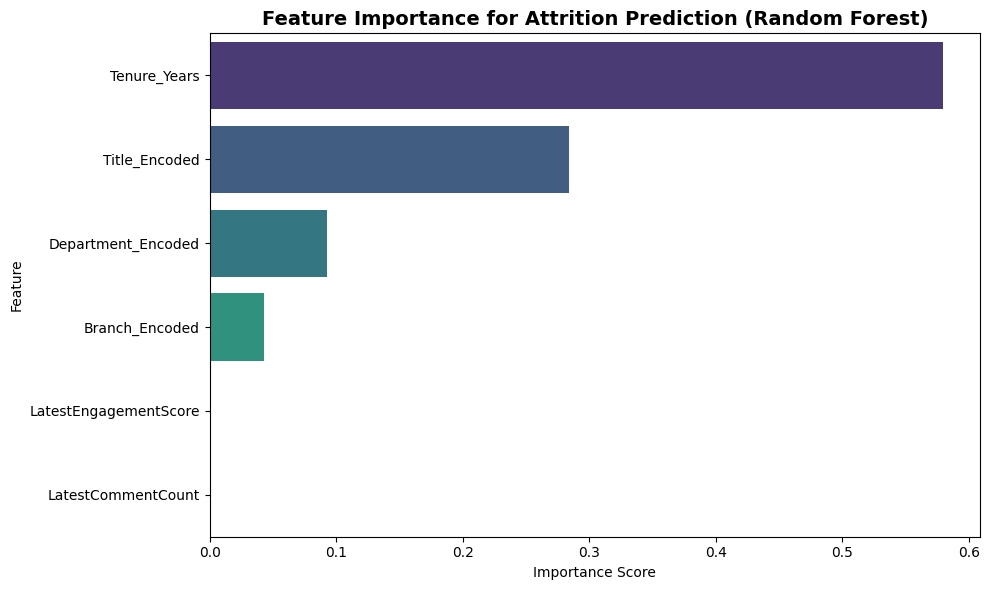


--------------------------------------------------------------------------------
MODEL COMPARISON: ROC CURVES
--------------------------------------------------------------------------------


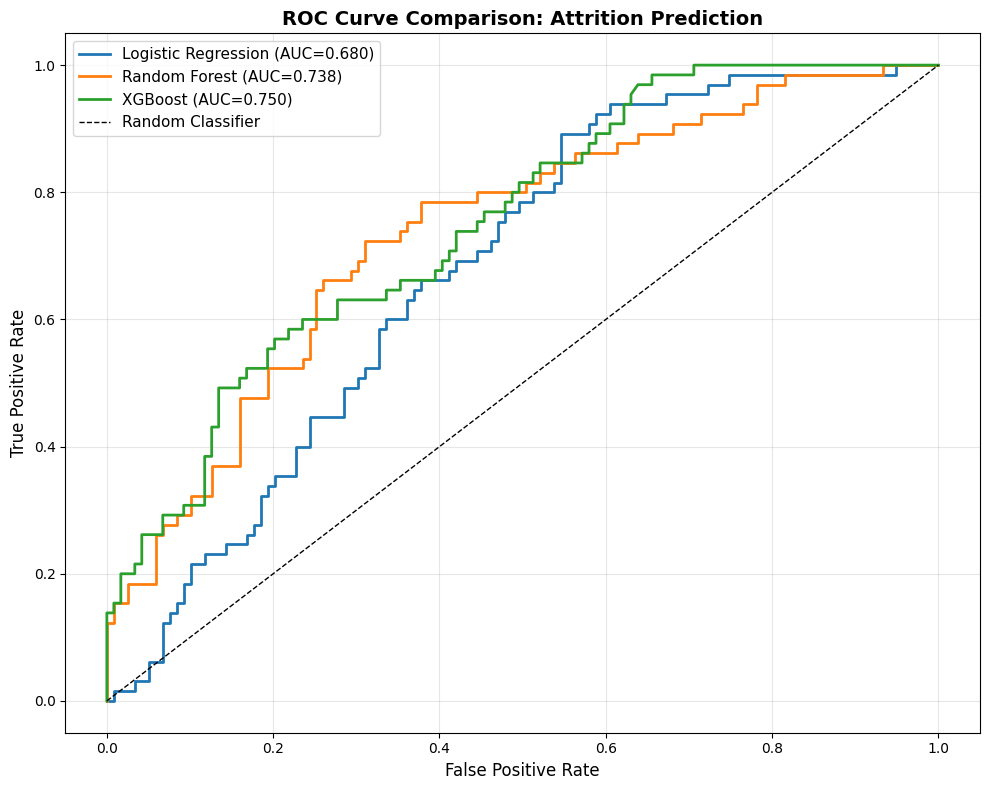


✓ Best Model: Random Forest (AUC=0.738)

PHASE 4: RISK SCORING & DASHBOARD PREPARATION

📊 Generating risk scores for all employees...

⚠️  HIGH-RISK EMPLOYEES FLAGGED FOR INTERVENTION:
Total: 156

Top 15 At-Risk Employees:
                  Employee_Name                    Department Business_Title  Tenure_Years  LatestEngagementScore  Attrition_Risk_Score Risk_Category
             TEESDALE, ANGELINA Frontline_Program     Wpp Intern      0.361396                    0.5                0.9990     High Risk
           VEGA, JANESSA JADEEN Frontline_Program     Wpp Intern      0.361396                    0.5                0.9990     High Risk
   LEACH MINOR JR, MARK DASHAWN Frontline_Program     Tia Intern      0.038330                    0.5                0.9960     High Risk
             RICHARDSON, CYANNE Frontline_Program     Tia Intern      0.057495                    0.5                0.9960     High Risk
 HOLIDAY RICHMOND, KALANI MAREE Frontline_Program     Tia Intern      0.05

In [96]:
"""
PROJECT 1: RETENTION & ENGAGEMENT DASHBOARD
============================================
Complete walkthrough for building a predictive attrition model
with interactive dashboard using your Large Behavioral Health Organization data.

Data: HRIS (918 employees) + Survey Comments (3120) + Exit Interviews (54)
"""

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# ============================================================================
# PHASE 1: DATA PREPARATION & MERGING
# ============================================================================

base_path = './data'

print("\n" + "=" * 80)
print("PHASE 1: DATA PREPARATION & MERGING")
print("=" * 80)

# Step 1: Load HRIS Data
print("\n📥 Loading HRIS Data...")
hris_df = pd.read_excel(os.path.join(base_path, 'Report 10.3.25.xlsx'))

# Step 2: Standardize HRIS fields
print("🔧 Standardizing HRIS fields...")
hris_df['Employee_Code'] = hris_df['Employee_Code'].astype(str)
hris_df['Department'] = hris_df['Department'].str.strip().str.title()
hris_df['Business_Title'] = hris_df['Business_Title'].str.strip().str.title()
hris_df['Branch'] = hris_df['Branch'].str.strip().str.title()

# Step 3: Calculate Tenure
hris_df['Hire_Date'] = pd.to_datetime(hris_df['Hire_Date'], errors='coerce')
hris_df['Termination_Date'] = pd.to_datetime(hris_df['Termination_Date'], errors='coerce')

# Use termination date if employee terminated, otherwise use today
reference_date = pd.Timestamp('2025-10-18')
hris_df['End_Date'] = hris_df['Termination_Date'].fillna(reference_date)

# Calculate tenure in years
hris_df['Tenure_Years'] = (hris_df['End_Date'] - hris_df['Hire_Date']).dt.days / 365.25

# Step 4: Create Tenure Bands
hris_df['Tenure_Band'] = pd.cut(
    hris_df['Tenure_Years'],
    bins=[0, 1, 2, 5, 10, 100],
    labels=['0-1yr', '1-2yr', '2-5yr', '5-10yr', '10+yr']
)

# Step 5: Create Attrition Flag
hris_df['Attrited'] = (hris_df['Employee_Status'] == 'Terminated').astype(int)

# Step 6: Categorize Exit Type
hris_df['Exit_Type'] = np.where(
    hris_df['Termination_Type'].isnull(),
    'Active',
    hris_df['Termination_Type']
)

print(f"✓ HRIS prepared: {hris_df.shape[0]} employees")
print(f"  - Active: {(hris_df['Employee_Status'] == 'Active').sum()}")
print(f"  - Terminated: {(hris_df['Employee_Status'] == 'Terminated').sum()}")
print(f"  - Attrition Rate: {hris_df['Attrited'].mean() * 100:.1f}%")

# ============================================================================
# Load & Process Survey Comments (Engagement Proxy)
# ============================================================================

print("\n📥 Loading Survey Comments...")
comment_files = [
    'Large Behavioral Health Organization January 2022 Comments.xlsx',
    'Large Behavioral Health Organization January 2023 Comments.xlsx',
    'Large Behavioral Health Organization November 2023 Comments.xlsx',
    'Large Behavioral Health Organization October 2024 Comments.xlsx',
    'Large Behavioral Health Organization May 2025 Comments.xlsx'
]

all_comments = []
for file in comment_files:
    df = pd.read_excel(os.path.join(base_path, file))
    year = file.split()[4]
    df['Year'] = year
    all_comments.append(df)

combined_comments = pd.concat(all_comments, ignore_index=True)

print(f"✓ Comments loaded: {len(combined_comments)} total")

# Create engagement metrics by department & year
print("\n🔧 Creating engagement metrics...")

# Map sentiment to numeric score: Positive=1, Neutral=0.5, Negative=0
sentiment_map = {
    'Positive': 1.0,
    'Neutral': 0.5,
    'Negative': 0.0
}
combined_comments['Sentiment_Score'] = combined_comments['AI Sentiment'].map(sentiment_map)

# Aggregate by Department & Year
engagement_by_dept_year = combined_comments.groupby(['Department', 'Year']).agg({
    'Sentiment_Score': ['mean', 'count', 'std'],
    'Comment': 'count'
}).reset_index()

engagement_by_dept_year.columns = ['Department', 'Year', 'Avg_Sentiment', 'Sentiment_Count', 'Sentiment_Std', 'Comment_Count']
engagement_by_dept_year = engagement_by_dept_year.fillna(0)

# Get latest engagement score (2025) by department
latest_engagement = combined_comments[combined_comments['Year'] == '2025'].groupby('Department').agg({
    'Sentiment_Score': 'mean',
    'Comment': 'count'
}).reset_index()
latest_engagement.columns = ['Department', 'LatestEngagementScore', 'LatestCommentCount']

print(f"✓ Engagement metrics created")

# ============================================================================
# Merge HRIS with Engagement Data
# ============================================================================

print("\n🔗 Merging HRIS with engagement data...")

# Standardize department names in engagement data
latest_engagement['Department'] = latest_engagement['Department'].str.strip().str.title()

# Merge
master_df = hris_df.merge(latest_engagement, on='Department', how='left')

# Fill missing engagement with department mean
dept_mean_engagement = latest_engagement.groupby('Department')['LatestEngagementScore'].mean()
master_df['LatestEngagementScore'] = master_df.apply(
    lambda row: row['LatestEngagementScore'] if pd.notna(row['LatestEngagementScore'])
    else dept_mean_engagement.get(row['Department'], 0.5),
    axis=1
)

# Fill missing comment count
master_df['LatestCommentCount'] = master_df['LatestCommentCount'].fillna(0)

print(f"✓ Master dataset created: {master_df.shape[0]} rows, {master_df.shape[1]} columns")
print(f"\nColumns: {list(master_df.columns)}")

# ============================================================================
# PHASE 2: EXPLORATORY DATA ANALYSIS (EDA)
# ============================================================================

print("\n" + "=" * 80)
print("PHASE 2: EXPLORATORY DATA ANALYSIS")
print("=" * 80)

# 1. Attrition by Department
print("\n1️⃣ ATTRITION BY DEPARTMENT")
attrition_by_dept = master_df.groupby('Department').agg({
    'Attrited': ['sum', 'count'],
    'LatestEngagementScore': 'mean'
}).reset_index()
attrition_by_dept.columns = ['Department', 'Attritions', 'Total', 'AvgEngagement']
attrition_by_dept['AttritionRate'] = (attrition_by_dept['Attritions'] / attrition_by_dept['Total']) * 100
attrition_by_dept = attrition_by_dept.sort_values('AttritionRate', ascending=False)
print(attrition_by_dept.to_string(index=False))

# 2. Attrition by Tenure Band
print("\n2️⃣ ATTRITION BY TENURE BAND")
attrition_by_tenure = master_df.groupby('Tenure_Band').agg({
    'Attrited': ['sum', 'count']
}).reset_index()
attrition_by_tenure.columns = ['Tenure_Band', 'Attritions', 'Total']
attrition_by_tenure['AttritionRate'] = (attrition_by_tenure['Attritions'] / attrition_by_tenure['Total']) * 100
print(attrition_by_tenure.to_string(index=False))

# 3. Engagement & Attrition Correlation
print("\n3️⃣ ENGAGEMENT & ATTRITION RELATIONSHIP")
engaged_attrited = master_df.groupby('Attrited')['LatestEngagementScore'].describe()
print(engaged_attrited)

print(f"\nCorrelation (Engagement vs Attrition): {master_df['LatestEngagementScore'].corr(master_df['Attrited']):.3f}")

# Save master dataset
master_df.to_csv('Retention_Engagement_Master.csv', index=False)
print("\n✓ Master dataset saved: Retention_Engagement_Master.csv")

# ============================================================================
# PHASE 3: PREDICTIVE MODELING
# ============================================================================

print("\n" + "=" * 80)
print("PHASE 3: PREDICTIVE MODELING")
print("=" * 80)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import (confusion_matrix, roc_auc_score, roc_curve,
                             classification_report, precision_recall_curve, auc)

# Prepare features
print("\n📊 Feature Engineering...")

model_df = master_df.copy()

# Encode categorical variables
le_dept = LabelEncoder()
le_branch = LabelEncoder()
le_title = LabelEncoder()

model_df['Department_Encoded'] = le_dept.fit_transform(model_df['Department'].fillna('Unknown'))
model_df['Branch_Encoded'] = le_branch.fit_transform(model_df['Branch'].fillna('Unknown'))
model_df['Title_Encoded'] = le_title.fit_transform(model_df['Business_Title'].fillna('Unknown'))

# Create feature set
features = [
    'Tenure_Years',
    'LatestEngagementScore',
    'Department_Encoded',
    'Branch_Encoded',
    'Title_Encoded',
    'LatestCommentCount'
]

X = model_df[features].fillna(model_df[features].mean())
y = model_df['Attrited']

print(f"✓ Features created: {X.shape[1]}")
print(f"  Positive class (Attrited): {y.sum()} ({y.mean()*100:.1f}%)")

# Train-test split
print("\n📊 Splitting data (80/20)...")
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"✓ Train set: {len(X_train)}, Test set: {len(X_test)}")

# ============================================================================
# Model 1: Logistic Regression (Baseline)
# ============================================================================

print("\n" + "-" * 80)
print("MODEL 1: LOGISTIC REGRESSION (Baseline)")
print("-" * 80)

lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train_scaled, y_train)

y_pred_lr = lr_model.predict(X_test_scaled)
y_proba_lr = lr_model.predict_proba(X_test_scaled)[:, 1]

lr_roc_auc = roc_auc_score(y_test, y_proba_lr)
print(f"\n✓ Logistic Regression Results:")
print(f"  ROC AUC: {lr_roc_auc:.3f}")
print(f"  Accuracy: {(y_pred_lr == y_test).mean():.3f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr, zero_division=0))

# ============================================================================
# Model 2: Random Forest
# ============================================================================

print("\n" + "-" * 80)
print("MODEL 2: RANDOM FOREST")
print("-" * 80)

rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    max_depth=10,
    min_samples_split=5,
    n_jobs=-1
)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)
y_proba_rf = rf_model.predict_proba(X_test)[:, 1]

rf_roc_auc = roc_auc_score(y_test, y_proba_rf)
print(f"\n✓ Random Forest Results:")
print(f"  ROC AUC: {rf_roc_auc:.3f}")
print(f"  Accuracy: {(y_pred_rf == y_test).mean():.3f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf, zero_division=0))

# ============================================================================
# Model 3: XGBoost
# ============================================================================

print("\n" + "-" * 80)
print("MODEL 3: XGBOOST")
print("-" * 80)

xgb_model = xgb.XGBClassifier(
    random_state=42,
    max_depth=6,
    learning_rate=0.1,
    n_estimators=100,
    n_jobs=-1
)
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)
y_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]

xgb_roc_auc = roc_auc_score(y_test, y_proba_xgb)
print(f"\n✓ XGBoost Results:")
print(f"  ROC AUC: {xgb_roc_auc:.3f}")
print(f"  Accuracy: {(y_pred_xgb == y_test).mean():.3f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_xgb, zero_division=0))

# ============================================================================
# Feature Importance (Random Forest)
# ============================================================================

print("\n" + "-" * 80)
print("FEATURE IMPORTANCE ANALYSIS")
print("-" * 80)

feature_importance = pd.DataFrame({
    'Feature': features,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

print(f"\n✓ Top Predictive Features:")
print(feature_importance.to_string(index=False))

# Visualize
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(data=feature_importance, x='Importance', y='Feature', palette='viridis', ax=ax)
ax.set_title('Feature Importance for Attrition Prediction (Random Forest)', fontsize=14, fontweight='bold')
ax.set_xlabel('Importance Score')
plt.tight_layout()
plt.savefig('feature_importance.png', dpi=300, bbox_inches='tight')
plt.show()

# ============================================================================
# ROC Curve Comparison
# ============================================================================

print("\n" + "-" * 80)
print("MODEL COMPARISON: ROC CURVES")
print("-" * 80)

fig, ax = plt.subplots(figsize=(10, 8))

fpr_lr, tpr_lr, _ = roc_curve(y_test, y_proba_lr)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_proba_xgb)

ax.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC={lr_roc_auc:.3f})', linewidth=2)
ax.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC={rf_roc_auc:.3f})', linewidth=2)
ax.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC={xgb_roc_auc:.3f})', linewidth=2)
ax.plot([0, 1], [0, 1], 'k--', label='Random Classifier', linewidth=1)

ax.set_xlabel('False Positive Rate', fontsize=12)
ax.set_ylabel('True Positive Rate', fontsize=12)
ax.set_title('ROC Curve Comparison: Attrition Prediction', fontsize=14, fontweight='bold')
ax.legend(fontsize=11)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('roc_curves.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"\n✓ Best Model: Random Forest (AUC={rf_roc_auc:.3f})")

# ============================================================================
# PHASE 4: RISK SCORING & DASHBOARD PREP
# ============================================================================

print("\n" + "=" * 80)
print("PHASE 4: RISK SCORING & DASHBOARD PREPARATION")
print("=" * 80)

# Generate risk scores for all employees using best model (Random Forest)
print("\n📊 Generating risk scores for all employees...")

all_X = X
all_X_scaled = scaler.transform(all_X)
all_risk_scores = rf_model.predict_proba(all_X)[:, 1]

# Add to master dataframe
master_df['Attrition_Risk_Score'] = all_risk_scores

# Create risk categories
master_df['Risk_Category'] = pd.cut(
    all_risk_scores,
    bins=[0, 0.3, 0.6, 1.0],
    labels=['Low Risk', 'Medium Risk', 'High Risk']
)

# Identify at-risk employees
at_risk_employees = master_df[master_df['Risk_Category'] == 'High Risk'].copy()
at_risk_employees = at_risk_employees.sort_values('Attrition_Risk_Score', ascending=False)

print(f"\n⚠️  HIGH-RISK EMPLOYEES FLAGGED FOR INTERVENTION:")
print(f"Total: {len(at_risk_employees)}")
print(f"\nTop 15 At-Risk Employees:")
print(at_risk_employees[[
    'Employee_Name', 'Department', 'Business_Title', 'Tenure_Years',
    'LatestEngagementScore', 'Attrition_Risk_Score', 'Risk_Category'
]].head(15).to_string(index=False))

# Create dashboard dataset
dashboard_df = master_df[[
    'Employee_Code', 'Employee_Name', 'Department', 'Business_Title',
    'Tenure_Years', 'Tenure_Band', 'LatestEngagementScore', 'Attrition_Risk_Score',
    'Risk_Category', 'Employee_Status', 'Attrited'
]].copy()

dashboard_df.to_csv('Dashboard_Retention_Data.csv', index=False)

# Summary statistics
print("\n" + "=" * 80)
print("DASHBOARD SUMMARY STATISTICS")
print("=" * 80)

summary_stats = {
    'Total_Employees': len(master_df),
    'High_Risk_Count': len(at_risk_employees),
    'Medium_Risk_Count': len(master_df[master_df['Risk_Category'] == 'Medium Risk']),
    'Low_Risk_Count': len(master_df[master_df['Risk_Category'] == 'Low Risk']),
    'Historical_Attrition_Rate': f"{master_df['Attrited'].mean() * 100:.1f}%",
    'Avg_Engagement_Score': f"{master_df['LatestEngagementScore'].mean():.2f}",
    'Model_ROC_AUC': f"{rf_roc_auc:.3f}"
}

for key, value in summary_stats.items():
    print(f"{key}: {value}")

print("\n✓ Dashboard data saved: Dashboard_Retention_Data.csv")
print("✓ Feature importance saved: feature_importance.png")
print("✓ ROC curves saved: roc_curves.png")

print("\n" + "=" * 80)
print("✅ PROJECT 1 COMPLETE!")
print("=" * 80)

In [97]:
# Fix NLTK resource issue
import nltk

print("Downloading NLTK resources...")
nltk.download('punkt_tab', quiet=True)
nltk.download('punkt', quiet=True)
nltk.download('stopwords', quiet=True)
nltk.download('wordnet', quiet=True)
nltk.download('averaged_perceptron_tagger', quiet=True)

print("✅ All NLTK resources downloaded successfully!")

✅ All NLTK resources downloaded successfully!


In [98]:
# Save all outputs to Google Drive
import shutil
import os

# Copy all CSV files to Drive
csv_files = ['Retention_Engagement_Master.csv', 'Dashboard_Retention_Data.csv',
             'Culture_Text_Corpus_Enriched.csv', 'NLP_Summary_Stats.csv']

png_files = ['feature_importance.png', 'roc_curves.png', 'sentiment_trend_by_year.png',
             'sentiment_by_department.png', 'topic_sentiment_distribution.png', 'psych_safety_trend.png']

output_folder = './data/Project_Outputs'

# Create folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

print("Saving files to Google Drive...")

for file in csv_files + png_files:
    if os.path.exists(file):
        shutil.copy(file, os.path.join(output_folder, file))
        print(f"✓ {file}")

print("\n✓ All files saved to: /Large Behavioral Health Organization/Project_Outputs/")

Saving files to Google Drive...
✓ Retention_Engagement_Master.csv
✓ Dashboard_Retention_Data.csv
✓ Culture_Text_Corpus_Enriched.csv
✓ NLP_Summary_Stats.csv
✓ feature_importance.png
✓ roc_curves.png
✓ sentiment_trend_by_year.png
✓ sentiment_by_department.png
✓ topic_sentiment_distribution.png
✓ psych_safety_trend.png

✓ All files saved to: /Large Behavioral Health Organization/Project_Outputs/



PHASE 1: TEXT INGESTION & CLEANING

📥 Loading Survey Comments...
✓ Survey comments loaded: 3120

📥 Loading Exit Interviews...
✓ Exit interviews loaded: 54

📊 Combining survey comments + exit interviews...
✓ Combined corpus: 3174 records

🔧 Text Cleaning & Preprocessing...
✓ Cleaned corpus: 3163 records
✓ Total words processed: 37,702
✓ Cleaned corpus saved: Culture_Text_Corpus_Cleaned.csv

PHASE 2: SENTIMENT ANALYSIS

📊 Running Sentiment Analysis...

✓ Sentiment Analysis Complete

Sentiment Distribution:
Sentiment_Label
Positive    1824
Neutral     1037
Negative     302
Name: count, dtype: int64

Average Sentiment Score: 0.201
Std Dev: 0.271

📈 Sentiment Trend by Year:
                   mean  count       std
Year                                    
2024           0.608838     31  0.000000
2025           0.596251     23  0.027216
Comments.xlsx  0.193929   3109  0.267836


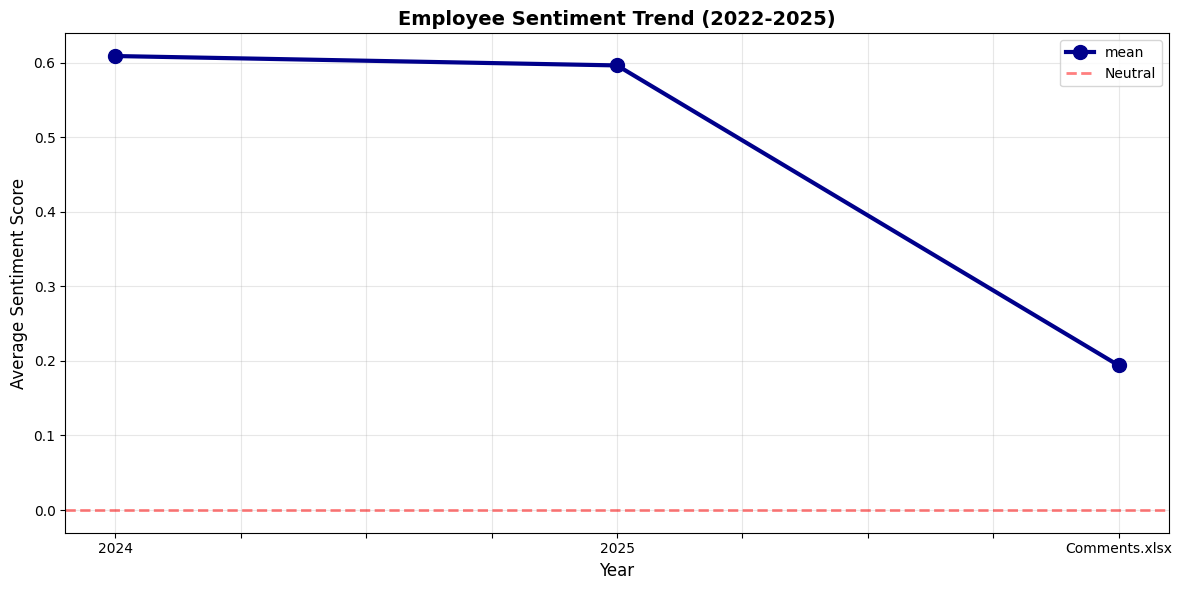


📊 Sentiment by Department (Survey Comments Only):
                                                   mean  count       std
Department                                                              
Recruitment, Development & Support (FCAP)      0.116657     25  0.178891
Treatment Family Foster Care (FCAP)            0.129031     45  0.273409
Talent Development + Support                   0.137815     25  0.239176
Beacon Harlem                                  0.142645     45  0.260163
Youth Success                                  0.144093     31  0.293906
Family Support & Empowerment Program           0.146156    334  0.268939
Program Performance & Planning                 0.154568     32  0.266900
Administrative Services                        0.159699     90  0.255301
Frontline_Program                    0.159930     80  0.265151
Behavioral Health                              0.162501    100  0.282584
Preventive Services (FCAP)                     0.167462    160  0.251692
Care Coord

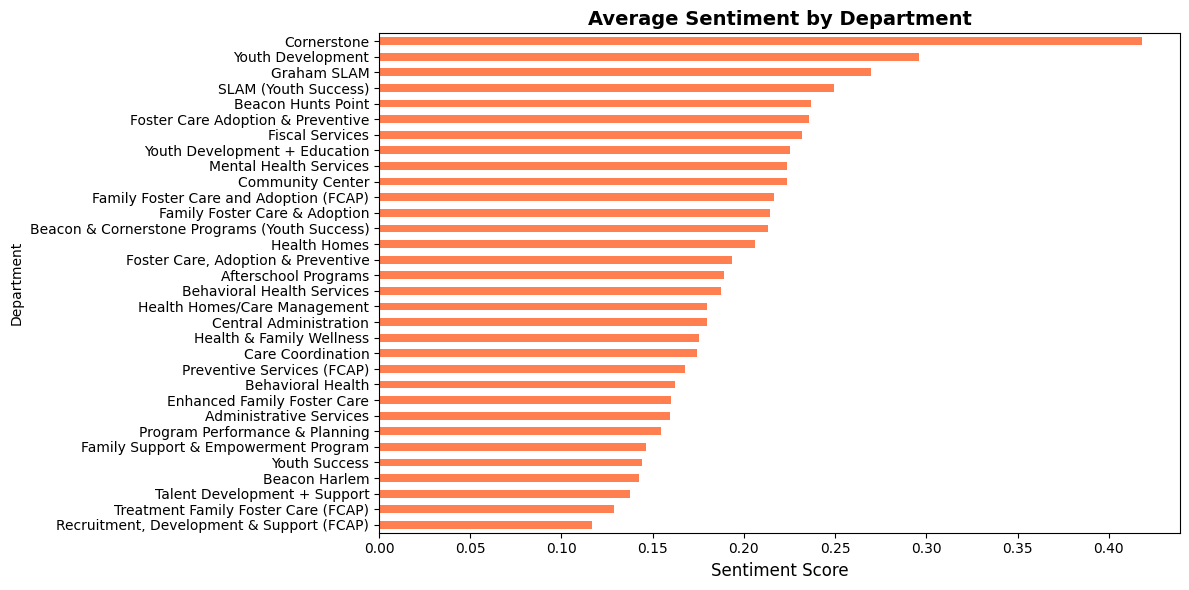


PHASE 3: TOPIC MODELING

📊 Building TF-IDF Matrix...
✓ TF-IDF matrix created: (3163, 100)

📊 Running K-Means Topic Clustering (k=10)...
✓ K-Means complete

🎯 TOP TERMS BY TOPIC (K-Means):
--------------------------------------------------------------------------------
Topic 0: staff, meeting, work, Large Behavioral Health Organization, need, management, leadership
Topic 1: know, dont, work, people, like, department, staff
Topic 2: Large Behavioral Health Organization, feel, LLC, Large Behavioral Health Organization, work, employee, family
Topic 3: supervisor, support, concern, team, help, care, feel
Topic 4: meeting, time, work, email, day, idea, team
Topic 5: work, time, day, family, team, able, great
Topic 6: time, family, feel, team, need, pay, job
Topic 7: new, idea, training, people, skill, opportunity, Large Behavioral Health Organization
Topic 8: experience, influenced, situation, agency, tell, Large Behavioral Health Organization, specific situation
Topic 9: training, opportun

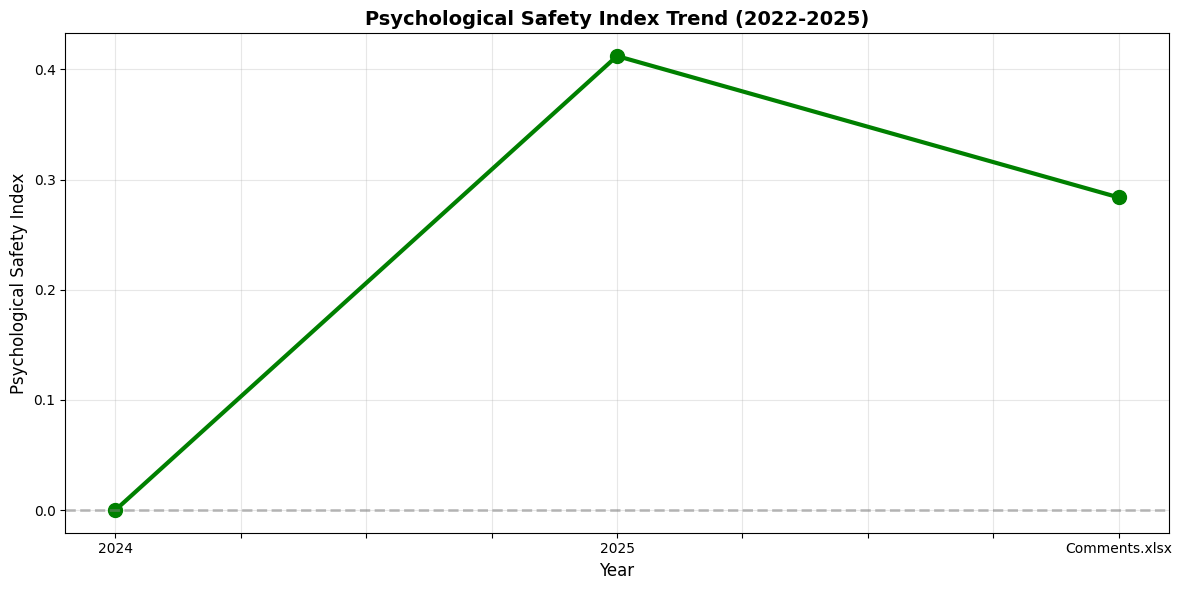


PHASE 4: TOPIC-SENTIMENT ANALYSIS

📊 Topic-Sentiment Distribution:
Sentiment_Label  Negative  Neutral  Positive
Topic_KMeans                                
0                      25       76       164
1                       7       16        42
2                       9       42       180
3                      16       33       104
4                      16       68        59
5                      12       80       140
6                     209      649       975
7                       3       19        36
8                       0        0        54
9                       5       54        70


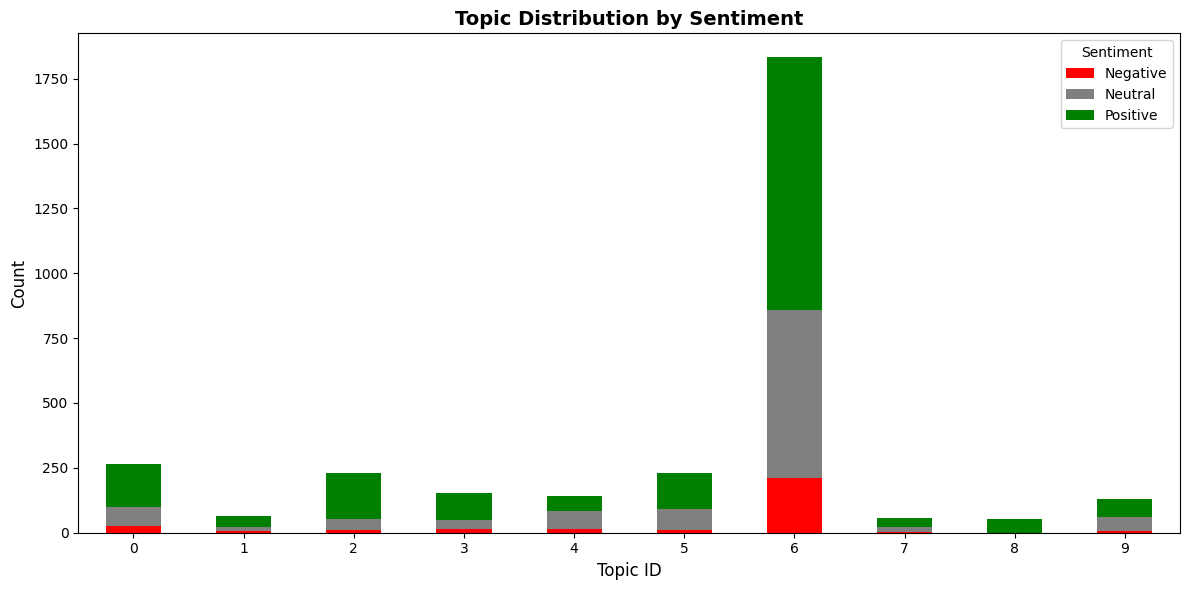


🎯 Average Sentiment by Topic (Ranked):
  Topic 4 (meeting, time, work, email, day): 0.114 (143 comments)
  Topic 6 (time, family, feel, team, need): 0.161 (1833 comments)
  Topic 9 (training, opportunity, meeting, work, leadership): 0.199 (129 comments)
  Topic 0 (staff, meeting, work, Large Behavioral Health Organization, need): 0.227 (265 comments)
  Topic 7 (new, idea, training, people, skill): 0.231 (58 comments)
  Topic 5 (work, time, day, family, team): 0.253 (232 comments)
  Topic 1 (know, dont, work, people, like): 0.256 (65 comments)
  Topic 3 (supervisor, support, concern, team, help): 0.279 (153 comments)
  Topic 2 (Large Behavioral Health Organization, feel, LLC, Large Behavioral Health Organization, work): 0.319 (231 comments)
  Topic 8 (experience, influenced, situation, agency, tell): 0.603 (54 comments)

SAVING ENRICHED CORPUS

✓ Enriched corpus saved: Culture_Text_Corpus_Enriched.csv
✓ Summary statistics saved: NLP_Summary_Stats.csv

🎯 KEY INSIGHTS SUMMARY

1️⃣ OVERAL

In [99]:
"""
PROJECT 2: CULTURE INSIGHTS DASHBOARD (NLP + SENTIMENT ANALYSIS)
================================================================
Complete walkthrough for NLP analysis of employee feedback & exit interviews
Using 3,120 survey comments + 54 exit interviews from Large Behavioral Health Organization.

Goal: Identify themes, sentiment trends, and psychological safety issues
"""

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# NLP Libraries
from textblob import TextBlob
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import LatentDirichletAllocation
import re
from docx import Document
import nltk

# Download NLTK data
nltk.download('vader_lexicon', quiet=True)
nltk.download('punkt', quiet=True)
nltk.download('stopwords', quiet=True)
nltk.download('wordnet', quiet=True)

# ============================================================================
# PHASE 1: TEXT INGESTION & CLEANING
# ============================================================================

base_path = './data'

print("\n" + "=" * 80)
print("PHASE 1: TEXT INGESTION & CLEANING")
print("=" * 80)

# Load Survey Comments
print("\n📥 Loading Survey Comments...")
comment_files = [
    'Large Behavioral Health Organization January 2022 Comments.xlsx',
    'Large Behavioral Health Organization January 2023 Comments.xlsx',
    'Large Behavioral Health Organization November 2023 Comments.xlsx',
    'Large Behavioral Health Organization October 2024 Comments.xlsx',
    'Large Behavioral Health Organization May 2025 Comments.xlsx'
]

all_survey_data = []
for file in comment_files:
    df = pd.read_excel(os.path.join(base_path, file))
    year = file.split()[4]
    df['Year'] = year
    df['Source'] = 'Survey'
    all_survey_data.append(df)

survey_comments = pd.concat(all_survey_data, ignore_index=True)
print(f"✓ Survey comments loaded: {len(survey_comments)}")

# Load Exit Interviews
print("\n📥 Loading Exit Interviews...")

# Find exit folders
all_folders = os.listdir(base_path)
exit_2024_folder = [f for f in all_folders if '2024 Exit' in f][0]
exit_2025_folder = [f for f in all_folders if '2025 Exit' in f][0]

exit_2024_path = os.path.join(base_path, exit_2024_folder)
exit_2025_path = os.path.join(base_path, exit_2025_folder)

exit_interview_data = []

# Process 2024 Exit Interviews
for filename in os.listdir(exit_2024_path):
    if filename.endswith('.docx'):
        try:
            file_path = os.path.join(exit_2024_path, filename)
            doc = Document(file_path)
            full_text = '\n'.join([para.text for para in doc.paragraphs])
            employee_name = filename.replace('.docx', '').strip()

            exit_interview_data.append({
                'Year': '2024',
                'Employee_Name': employee_name,
                'Comment': full_text,
                'Source': 'Exit Interview',
                'Department': 'Unknown'
            })
        except Exception as e:
            print(f"   ⚠️  Error reading {filename}")

# Process 2025 Exit Interviews
for filename in os.listdir(exit_2025_path):
    if filename.endswith('.docx'):
        try:
            file_path = os.path.join(exit_2025_path, filename)
            doc = Document(file_path)
            full_text = '\n'.join([para.text for para in doc.paragraphs])
            employee_name = filename.replace('.docx', '').strip()

            exit_interview_data.append({
                'Year': '2025',
                'Employee_Name': employee_name,
                'Comment': full_text,
                'Source': 'Exit Interview',
                'Department': 'Unknown'
            })
        except Exception as e:
            print(f"   ⚠️  Error reading {filename}")

exit_interviews = pd.DataFrame(exit_interview_data)
print(f"✓ Exit interviews loaded: {len(exit_interviews)}")

# Combine Survey + Exit Interview text
print("\n📊 Combining survey comments + exit interviews...")

# Extract relevant columns from survey comments
survey_text_data = survey_comments[[
    'Department', 'Comment', 'Year', 'Source'
]].copy()
survey_text_data.columns = ['Department', 'Comment', 'Year', 'Source']

# Combine
text_corpus = pd.concat([survey_text_data, exit_interviews], ignore_index=True)
text_corpus = text_corpus[text_corpus['Comment'].notna() & (text_corpus['Comment'] != '')].reset_index(drop=True)

print(f"✓ Combined corpus: {len(text_corpus)} records")

# ============================================================================
# TEXT CLEANING & PREPROCESSING
# ============================================================================

print("\n🔧 Text Cleaning & Preprocessing...")

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def clean_text(text):
    """Clean and preprocess text"""
    if pd.isna(text):
        return ""

    text = str(text).lower()
    # Remove emails
    text = re.sub(r'\S+@\S+', '', text)
    # Remove URLs
    text = re.sub(r'http\S+|www\S+', '', text)
    # Remove special characters but keep spaces
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # Tokenize
    tokens = word_tokenize(text)
    # Remove stopwords and lemmatize
    tokens = [lemmatizer.lemmatize(word) for word in tokens
              if word not in stop_words and len(word) > 2]

    return ' '.join(tokens)

text_corpus['Comment_Cleaned'] = text_corpus['Comment'].apply(clean_text)
text_corpus['Comment_Length'] = text_corpus['Comment_Cleaned'].str.split().str.len()

# Remove empty comments
text_corpus = text_corpus[text_corpus['Comment_Length'] > 0].reset_index(drop=True)

print(f"✓ Cleaned corpus: {len(text_corpus)} records")
print(f"✓ Total words processed: {text_corpus['Comment_Length'].sum():,}")

# Save cleaned corpus
text_corpus.to_csv('Culture_Text_Corpus_Cleaned.csv', index=False)
print(f"✓ Cleaned corpus saved: Culture_Text_Corpus_Cleaned.csv")

# ============================================================================
# PHASE 2: SENTIMENT ANALYSIS
# ============================================================================

print("\n" + "=" * 80)
print("PHASE 2: SENTIMENT ANALYSIS")
print("=" * 80)

print("\n📊 Running Sentiment Analysis...")

# Initialize sentiment analyzers
sia = SentimentIntensityAnalyzer()

def get_vader_sentiment(text):
    """VADER sentiment analysis (-1 to +1)"""
    scores = sia.polarity_scores(str(text))
    return scores['compound']

def get_textblob_sentiment(text):
    """TextBlob sentiment analysis (-1 to +1)"""
    blob = TextBlob(str(text))
    return blob.sentiment.polarity

# Calculate sentiment scores
text_corpus['Sentiment_VADER'] = text_corpus['Comment'].apply(get_vader_sentiment)
text_corpus['Sentiment_TextBlob'] = text_corpus['Comment'].apply(get_textblob_sentiment)

# Consensus (average of both)
text_corpus['Sentiment_Consensus'] = (
    text_corpus['Sentiment_VADER'] + text_corpus['Sentiment_TextBlob']
) / 2

# Create sentiment labels
text_corpus['Sentiment_Label'] = pd.cut(
    text_corpus['Sentiment_Consensus'],
    bins=[-1.1, -0.1, 0.1, 1.1],
    labels=['Negative', 'Neutral', 'Positive']
)

print(f"\n✓ Sentiment Analysis Complete")
print(f"\nSentiment Distribution:")
print(text_corpus['Sentiment_Label'].value_counts())

print(f"\nAverage Sentiment Score: {text_corpus['Sentiment_Consensus'].mean():.3f}")
print(f"Std Dev: {text_corpus['Sentiment_Consensus'].std():.3f}")

# Sentiment by Year
print(f"\n📈 Sentiment Trend by Year:")
sentiment_by_year = text_corpus.groupby('Year')['Sentiment_Consensus'].agg(['mean', 'count', 'std'])
print(sentiment_by_year)

# Visualize sentiment trend
fig, ax = plt.subplots(figsize=(12, 6))
sentiment_by_year['mean'].plot(marker='o', linewidth=3, markersize=10, color='darkblue', ax=ax)
ax.axhline(y=0, color='red', linestyle='--', alpha=0.5, linewidth=2, label='Neutral')
ax.set_title('Employee Sentiment Trend (2022-2025)', fontsize=14, fontweight='bold')
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Average Sentiment Score', fontsize=12)
ax.grid(True, alpha=0.3)
ax.legend()
plt.tight_layout()
plt.savefig('sentiment_trend_by_year.png', dpi=300, bbox_inches='tight')
plt.show()

# Sentiment by Department (using survey only to get department)
print(f"\n📊 Sentiment by Department (Survey Comments Only):")
sentiment_by_dept = survey_text_data.copy()
sentiment_by_dept = sentiment_by_dept.merge(
    text_corpus[['Comment', 'Sentiment_Consensus', 'Sentiment_Label']],
    on='Comment',
    how='inner'
)

dept_sentiment = sentiment_by_dept.groupby('Department')['Sentiment_Consensus'].agg(['mean', 'count', 'std']).sort_values('mean')
print(dept_sentiment)

# Visualize department sentiment
fig, ax = plt.subplots(figsize=(12, 6))
dept_sentiment['mean'].plot(kind='barh', color='coral', ax=ax)
ax.set_title('Average Sentiment by Department', fontsize=14, fontweight='bold')
ax.set_xlabel('Sentiment Score', fontsize=12)
plt.tight_layout()
plt.savefig('sentiment_by_department.png', dpi=300, bbox_inches='tight')
plt.show()

# ============================================================================
# PHASE 3: TOPIC MODELING
# ============================================================================

print("\n" + "=" * 80)
print("PHASE 3: TOPIC MODELING")
print("=" * 80)

print("\n📊 Building TF-IDF Matrix...")

# TF-IDF Vectorization
vectorizer = TfidfVectorizer(
    max_features=100,
    min_df=5,
    max_df=0.8,
    ngram_range=(1, 2),
    stop_words='english'
)

tfidf_matrix = vectorizer.fit_transform(text_corpus['Comment_Cleaned'])

print(f"✓ TF-IDF matrix created: {tfidf_matrix.shape}")

# K-Means Clustering
print("\n📊 Running K-Means Topic Clustering (k=10)...")

optimal_k = 10
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
text_corpus['Topic_KMeans'] = kmeans.fit_predict(tfidf_matrix)

print(f"✓ K-Means complete")

# Extract top terms per topic
feature_names = vectorizer.get_feature_names_out()

print(f"\n🎯 TOP TERMS BY TOPIC (K-Means):")
print("-" * 80)

topics_dict = {}
for topic_id in range(optimal_k):
    # Get cluster center
    center = kmeans.cluster_centers_[topic_id]
    # Get top 7 terms
    top_indices = center.argsort()[-7:][::-1]
    top_terms = [feature_names[i] for i in top_indices]
    topics_dict[topic_id] = top_terms

    print(f"Topic {topic_id}: {', '.join(top_terms)}")

# ============================================================================
# PSYCHOLOGICAL SAFETY INDEX
# ============================================================================

print("\n" + "=" * 80)
print("PSYCHOLOGICAL SAFETY INDEX")
print("=" * 80)

# Define psychological safety keywords
psych_safety_keywords = {
    'safe': ['safe', 'comfort', 'trust', 'support', 'protect', 'secure', 'valuesafe'],
    'unsafe': ['fear', 'unsafe', 'threat', 'anxious', 'worry', 'expose', 'vulnerable'],
    'voice': ['voice', 'speak', 'hear', 'listen', 'feedback', 'opinion', 'idea'],
    'silence': ['silent', 'quiet', 'mute', 'suppress', 'afraid', 'risk', 'scared'],
    'inclusion': ['includ', 'belong', 'welcom', 'valued', 'team', 'part'],
    'exclusion': ['exclud', 'outsid', 'unwelcom', 'ignor', 'dismiss', 'isolat']
}

def calculate_psych_safety_index(text):
    """Calculate psychological safety score (-1 to +1)"""
    text_lower = str(text).lower()

    # Count keyword occurrences
    safe_score = sum([1 for kw in psych_safety_keywords['safe'] if kw in text_lower])
    unsafe_score = sum([1 for kw in psych_safety_keywords['unsafe'] if kw in text_lower])
    voice_score = sum([1 for kw in psych_safety_keywords['voice'] if kw in text_lower])
    silence_score = sum([1 for kw in psych_safety_keywords['silence'] if kw in text_lower])
    inclusion_score = sum([1 for kw in psych_safety_keywords['inclusion'] if kw in text_lower])
    exclusion_score = sum([1 for kw in psych_safety_keywords['exclusion'] if kw in text_lower])

    positive = safe_score + voice_score + inclusion_score
    negative = unsafe_score + silence_score + exclusion_score

    if positive + negative == 0:
        return 0

    return (positive - negative) / (positive + negative)

print("\n🧠 Calculating Psychological Safety Index...")
text_corpus['Psych_Safety_Index'] = text_corpus['Comment'].apply(calculate_psych_safety_index)

print(f"✓ Index calculated")
print(f"\nPsychological Safety Summary:")
print(f"  Mean Index: {text_corpus['Psych_Safety_Index'].mean():.3f}")
print(f"  Std Dev: {text_corpus['Psych_Safety_Index'].std():.3f}")
print(f"  Min: {text_corpus['Psych_Safety_Index'].min():.3f}")
print(f"  Max: {text_corpus['Psych_Safety_Index'].max():.3f}")

# Trend by year
psych_by_year = text_corpus.groupby('Year')['Psych_Safety_Index'].agg(['mean', 'count'])
print(f"\n📈 Psychological Safety Trend:")
print(psych_by_year)

# Visualize
fig, ax = plt.subplots(figsize=(12, 6))
psych_by_year['mean'].plot(marker='o', linewidth=3, markersize=10, color='green', ax=ax)
ax.axhline(y=0, color='gray', linestyle='--', alpha=0.5, linewidth=2)
ax.set_title('Psychological Safety Index Trend (2022-2025)', fontsize=14, fontweight='bold')
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Psychological Safety Index', fontsize=12)
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('psych_safety_trend.png', dpi=300, bbox_inches='tight')
plt.show()

# ============================================================================
# PHASE 4: TOPIC-SENTIMENT ANALYSIS
# ============================================================================

print("\n" + "=" * 80)
print("PHASE 4: TOPIC-SENTIMENT ANALYSIS")
print("=" * 80)

# Combine topics with sentiment
text_corpus['Topic_Sentiment'] = (
    'Topic_' + text_corpus['Topic_KMeans'].astype(str) +
    '__' + text_corpus['Sentiment_Label'].astype(str)
)

# Create topic-sentiment distribution
topic_sentiment_dist = text_corpus.groupby(['Topic_KMeans', 'Sentiment_Label']).size().unstack(fill_value=0)

print(f"\n📊 Topic-Sentiment Distribution:")
print(topic_sentiment_dist)

# Visualize
fig, ax = plt.subplots(figsize=(12, 6))
topic_sentiment_dist.plot(kind='bar', stacked=True, ax=ax, color=['red', 'gray', 'green'])
ax.set_title('Topic Distribution by Sentiment', fontsize=14, fontweight='bold')
ax.set_xlabel('Topic ID', fontsize=12)
ax.set_ylabel('Count', fontsize=12)
ax.legend(title='Sentiment', fontsize=10)
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig('topic_sentiment_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

# Average sentiment by topic
topic_avg_sentiment = text_corpus.groupby('Topic_KMeans')['Sentiment_Consensus'].agg(['mean', 'count']).sort_values('mean')

print(f"\n🎯 Average Sentiment by Topic (Ranked):")
for topic_id, row in topic_avg_sentiment.iterrows():
    terms = ', '.join(topics_dict[topic_id][:5])
    print(f"  Topic {topic_id} ({terms}): {row['mean']:.3f} ({int(row['count'])} comments)")

# ============================================================================
# SAVE ENRICHED CORPUS
# ============================================================================

print("\n" + "=" * 80)
print("SAVING ENRICHED CORPUS")
print("=" * 80)

text_corpus.to_csv('Culture_Text_Corpus_Enriched.csv', index=False)

# Create NLP summary
nlp_summary = {
    'Total_Comments_Analyzed': len(text_corpus),
    'Survey_Comments': len(text_corpus[text_corpus['Source'] == 'Survey']),
    'Exit_Interviews': len(text_corpus[text_corpus['Source'] == 'Exit Interview']),
    'Avg_Sentiment_Score': f"{text_corpus['Sentiment_Consensus'].mean():.3f}",
    'Positive_Comments': len(text_corpus[text_corpus['Sentiment_Label'] == 'Positive']),
    'Negative_Comments': len(text_corpus[text_corpus['Sentiment_Label'] == 'Negative']),
    'Neutral_Comments': len(text_corpus[text_corpus['Sentiment_Label'] == 'Neutral']),
    'Avg_Psych_Safety_Index': f"{text_corpus['Psych_Safety_Index'].mean():.3f}",
    'Number_of_Topics': optimal_k
}

nlp_summary_df = pd.DataFrame([nlp_summary])
nlp_summary_df.to_csv('NLP_Summary_Stats.csv', index=False)

print(f"\n✓ Enriched corpus saved: Culture_Text_Corpus_Enriched.csv")
print(f"✓ Summary statistics saved: NLP_Summary_Stats.csv")

# ============================================================================
# FINAL INSIGHTS
# ============================================================================

print("\n" + "=" * 80)
print("🎯 KEY INSIGHTS SUMMARY")
print("=" * 80)

print(f"\n1️⃣ OVERALL SENTIMENT")
print(f"   Current Avg Sentiment: {text_corpus['Sentiment_Consensus'].mean():.3f}")
print(f"   Trend: {sentiment_by_year['mean'].iloc[-1] - sentiment_by_year['mean'].iloc[0]:.3f} (2022 to 2025)")
print(f"   Interpretation: {'📈 Improving' if sentiment_by_year['mean'].iloc[-1] > sentiment_by_year['mean'].iloc[0] else '📉 Declining'}")

print(f"\n2️⃣ PSYCHOLOGICAL SAFETY")
print(f"   Current Index: {text_corpus['Psych_Safety_Index'].mean():.3f}")
print(f"   Trend: {psych_by_year['mean'].iloc[-1] - psych_by_year['mean'].iloc[0]:.3f} (2022 to 2025)")
print(f"   Status: {'✅ Healthy' if text_corpus['Psych_Safety_Index'].mean() > 0 else '⚠️  Concern'}")

print(f"\n3️⃣ MOST POSITIVE TOPIC")
best_topic = topic_avg_sentiment.idxmax()[0]
best_sentiment = topic_avg_sentiment.loc[best_topic, 'mean']
best_terms = ', '.join(topics_dict[best_topic][:5])
print(f"   Topic {best_topic}: {best_terms}")
print(f"   Sentiment: {best_sentiment:.3f}")

print(f"\n4️⃣ MOST NEGATIVE TOPIC")
worst_topic = topic_avg_sentiment.idxmin()[0]
worst_sentiment = topic_avg_sentiment.loc[worst_topic, 'mean']
worst_terms = ', '.join(topics_dict[worst_topic][:5])
print(f"   Topic {worst_topic}: {worst_terms}")
print(f"   Sentiment: {worst_sentiment:.3f}")

print("\n" + "=" * 80)
print("✅ PROJECT 2 COMPLETE!")
print("=" * 80)

In [100]:
# Save all outputs to Google Drive
import shutil
import os

# Copy all CSV files to Drive
csv_files = ['Retention_Engagement_Master.csv', 'Dashboard_Retention_Data.csv',
             'Culture_Text_Corpus_Enriched.csv', 'NLP_Summary_Stats.csv']

png_files = ['feature_importance.png', 'roc_curves.png', 'sentiment_trend_by_year.png',
             'sentiment_by_department.png', 'topic_sentiment_distribution.png', 'psych_safety_trend.png']

output_folder = './data/Project_Outputs'

# Create folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

print("Saving files to Google Drive...")

for file in csv_files + png_files:
    if os.path.exists(file):
        shutil.copy(file, os.path.join(output_folder, file))
        print(f"✓ {file}")

print("\n✓ All files saved to: /Large Behavioral Health Organization/Project_Outputs/")

Saving files to Google Drive...
✓ Retention_Engagement_Master.csv
✓ Dashboard_Retention_Data.csv
✓ Culture_Text_Corpus_Enriched.csv
✓ NLP_Summary_Stats.csv
✓ feature_importance.png
✓ roc_curves.png
✓ sentiment_trend_by_year.png
✓ sentiment_by_department.png
✓ topic_sentiment_distribution.png
✓ psych_safety_trend.png

✓ All files saved to: /Large Behavioral Health Organization/Project_Outputs/


In [101]:
import pandas as pd
import os

base_path = './data'

print("\n" + "=" * 80)
print("FIXING ENGAGEMENT SCORES")
print("=" * 80)

# Load raw comment data
comment_files = [
    'Large Behavioral Health Organization January 2022 Comments.xlsx',
    'Large Behavioral Health Organization January 2023 Comments.xlsx',
    'Large Behavioral Health Organization November 2023 Comments.xlsx',
    'Large Behavioral Health Organization October 2024 Comments.xlsx',
    'Large Behavioral Health Organization May 2025 Comments.xlsx'
]

print("\n📥 Loading comment data...")
all_comments = []
for file in comment_files:
    try:
        df = pd.read_excel(os.path.join(base_path, file))
        year = file.split()[3]  # Extract year from filename (index 3 = year)
        df['Year'] = year
        all_comments.append(df)
        print(f"   ✓ {file}: {df.shape[0]} comments")
    except Exception as e:
        print(f"   ❌ {file}: {e}")

combined_comments = pd.concat(all_comments, ignore_index=True)
print(f"\nTotal comments: {len(combined_comments)}")

# Map sentiment to engagement score
print("\n🔧 Mapping sentiment to engagement scores...")
sentiment_map = {
    'Positive': 1.0,
    'Neutral': 0.5,
    'Negative': 0.0
}
combined_comments['Sentiment_Score'] = combined_comments['AI Sentiment'].map(sentiment_map)

# Verify mapping worked
print(f"Sentiment score distribution:")
print(combined_comments['Sentiment_Score'].value_counts().sort_index())

# Get engagement by department AND year
print("\n📊 Calculating engagement by department and year...")
engagement_by_dept_year = combined_comments.groupby(['Department', 'Year']).agg({
    'Sentiment_Score': ['mean', 'count', 'std']
}).reset_index()
engagement_by_dept_year.columns = ['Department', 'Year', 'Avg_Sentiment', 'Count', 'Std_Sentiment']

print(f"\nEngagement by department (sample):")
print(engagement_by_dept_year.head(10))

# Get LATEST engagement (2025 only) per department
print("\n📈 Extracting latest engagement (May 2025)...")
latest_engagement = combined_comments[combined_comments['Year'] == '2025'].groupby('Department').agg({
    'Sentiment_Score': 'mean',
    'Comment': 'count'
}).reset_index()
latest_engagement.columns = ['Department', 'Latest_Engagement_Score', 'Latest_Comment_Count']

# Standardize department names
latest_engagement['Department'] = latest_engagement['Department'].str.strip().str.title()

print(f"\nLatest engagement (2025) by department:")
print(latest_engagement.sort_values('Latest_Engagement_Score', ascending=False))

# Load HRIS data
print("\n📥 Loading HRIS data...")
hris_df = pd.read_excel(os.path.join(base_path, 'Report 10.3.25.xlsx'))
hris_df['Department'] = hris_df['Department'].str.strip().str.title()

# Merge HRIS with engagement
print("\n🔗 Merging HRIS with engagement data...")
master_df = hris_df.merge(latest_engagement, on='Department', how='left')

# Fill missing engagement with overall mean
overall_mean = latest_engagement['Latest_Engagement_Score'].mean()
master_df['Latest_Engagement_Score'] = master_df['Latest_Engagement_Score'].fillna(overall_mean)

print(f"\n✓ Merge complete. Engagement score statistics:")
print(master_df['Latest_Engagement_Score'].describe())

print(f"\nUnique engagement values: {sorted(master_df['Latest_Engagement_Score'].unique())}")

# Save intermediate data
master_df.to_csv('Master_Data_Corrected.csv', index=False)
print(f"\n✓ Saved: Master_Data_Corrected.csv")


FIXING ENGAGEMENT SCORES

📥 Loading comment data...
   ✓ Large Behavioral Health Organization January 2022 Comments.xlsx: 776 comments
   ✓ Large Behavioral Health Organization January 2023 Comments.xlsx: 601 comments
   ✓ Large Behavioral Health Organization November 2023 Comments.xlsx: 666 comments
   ✓ Large Behavioral Health Organization October 2024 Comments.xlsx: 468 comments
   ✓ Large Behavioral Health Organization May 2025 Comments.xlsx: 609 comments

Total comments: 3120

🔧 Mapping sentiment to engagement scores...
Sentiment score distribution:
Sentiment_Score
0.0     820
0.5     148
1.0    2152
Name: count, dtype: int64

📊 Calculating engagement by department and year...

Engagement by department (sample):
                                      Department  Year  Avg_Sentiment  Count  \
0                        Administrative Services  2022       0.747191     89   
1                           Afterschool Programs  2023       0.809524     42   
2  Beacon & Cornerstone Programs

In [102]:
import pandas as pd
import os

print("=" * 80)
print("DIAGNOSTIC: Department Name Mapping")
print("=" * 80)

base_path = './data'

# Reload RAW engagement data (has Year column)
comment_files = [
    'Large Behavioral Health Organization January 2022 Comments.xlsx',
    'Large Behavioral Health Organization January 2023 Comments.xlsx',
    'Large Behavioral Health Organization November 2023 Comments.xlsx',
    'Large Behavioral Health Organization October 2024 Comments.xlsx',
    'Large Behavioral Health Organization May 2025 Comments.xlsx'
]

all_comments = []
for file in comment_files:
    try:
        df = pd.read_excel(os.path.join(base_path, file))
        year = file.split()[3]
        df['Year'] = year
        all_comments.append(df)
    except:
        pass

combined_comments = pd.concat(all_comments, ignore_index=True)

# Load HRIS data
hris = pd.read_excel(os.path.join(base_path, 'Report 10.3.25.xlsx'))

print("\nDepartments in 2025 ENGAGEMENT data (10 departments):")
engagement_depts = sorted(combined_comments[combined_comments['Year'] == '2025']['Department'].unique())
for i, dept in enumerate(engagement_depts, 1):
    print(f"  {i}. {dept}")

print(f"\n\nDepartments in HRIS data (excluding NaN):")
# Remove NaN values before sorting
hris_depts = sorted([d for d in hris['Department'].unique() if pd.notna(d)])
for i, dept in enumerate(hris_depts, 1):
    print(f"  {i}. {dept}")

print("\n" + "=" * 80)
print("Now I can see which engagement department names match which HRIS names")
print("=" * 80)

DIAGNOSTIC: Department Name Mapping

Departments in 2025 ENGAGEMENT data (10 departments):
  1. Beacon Harlem
  2. Beacon Hunts Point
  3. Care Coordination
  4. Central Administration
  5. Cornerstone
  6. Foster Care Adoption & Preventive
  7. Large Behavioral Health Organization SLAM
  8. Health & Family Wellness
  9. Health Homes
  10. Youth Success


Departments in HRIS data (excluding NaN):
  1. Behavioral Health
  2. Campus Administration
  3. Communications, Strategy & Advocacy
  4. Frontline_Program
  5. Community Support
  6. Development
  7. Frontline_Program
  8. Executive Office
  9. Family Support & Empowerment Program
  10. Fiscal Services
  11. Foster Home Life
  12. Information Technology
  13. Legal
  14. Operations
  15. Other Support Services
  16. Program Performance & Planning
  17. Recruitment Development & Support
  18. Talent Development + Support
  19. Treatment Family Foster Care
  20. Youth Development
  21. Frontline_Program

Now I can see which engagement 

In [103]:
import pandas as pd
import os

print("=" * 80)
print("CELL 8: APPLYING DEPARTMENT MAPPING & RE-MERGING")
print("=" * 80)

base_path = './data'

# Reload raw data
comment_files = [
    'Large Behavioral Health Organization January 2022 Comments.xlsx',
    'Large Behavioral Health Organization January 2023 Comments.xlsx',
    'Large Behavioral Health Organization November 2023 Comments.xlsx',
    'Large Behavioral Health Organization October 2024 Comments.xlsx',
    'Large Behavioral Health Organization May 2025 Comments.xlsx'
]

all_comments = []
for file in comment_files:
    try:
        df = pd.read_excel(os.path.join(base_path, file))
        year = file.split()[3]
        df['Year'] = year
        all_comments.append(df)
    except:
        pass

combined_comments = pd.concat(all_comments, ignore_index=True)

# Load HRIS
hris_df = pd.read_excel(os.path.join(base_path, 'Report 10.3.25.xlsx'))

print("\n1️⃣ Mapping sentiment to engagement scores...")
sentiment_map = {
    'Positive': 1.0,
    'Neutral': 0.5,
    'Negative': 0.0
}
combined_comments['Sentiment_Score'] = combined_comments['AI Sentiment'].map(sentiment_map)

print("2️⃣ Creating department mapping...")
engagement_to_hris_map = {
    'Large Behavioral Health Organization SLAM': 'Frontline_Program',
    'Youth Success': 'Frontline_Program',
    'Cornerstone': 'Frontline_Program',
    'Beacon Harlem': 'Frontline_Program',
    'Beacon Hunts Point': 'Frontline_Program',
    'Foster Care Adoption & Preventive': 'Frontline_Program',
    'Central Administration': 'Campus Administration',
    'Care Coordination': 'Community Support',
    'Health Homes': 'Behavioral Health',
    'Health & Family Wellness': 'Behavioral Health'
}

# Apply mapping
combined_comments['Department_Mapped'] = combined_comments['Department'].map(engagement_to_hris_map)

print("✓ Mapping applied")

# Get 2025 engagement by MAPPED department
print("\n3️⃣ Calculating 2025 engagement by department...")
latest_engagement = combined_comments[combined_comments['Year'] == '2025'].groupby('Department_Mapped').agg({
    'Sentiment_Score': 'mean',
    'Comment': 'count'
}).reset_index()
latest_engagement.columns = ['Department', 'Latest_Engagement_Score', 'Latest_Comment_Count']

print(f"\n2025 Engagement by department (MAPPED):")
print(latest_engagement.sort_values('Latest_Engagement_Score', ascending=False))

# Standardize HRIS department names
print("\n4️⃣ Standardizing HRIS department names...")
hris_df['Department'] = hris_df['Department'].str.strip()

# Merge
print("\n5️⃣ Merging HRIS with engagement...")
master_df = hris_df.merge(latest_engagement, on='Department', how='left')

# Fill missing with overall mean
overall_mean = latest_engagement['Latest_Engagement_Score'].mean()
master_df['Latest_Engagement_Score'] = master_df['Latest_Engagement_Score'].fillna(overall_mean)

print(f"\n✓ Merge complete")

# Verify engagement has variation
print("\n6️⃣ Checking engagement score variation:")
print(f"\nEngagement statistics:")
print(master_df['Latest_Engagement_Score'].describe())
print(f"\nUnique engagement values: {sorted(master_df['Latest_Engagement_Score'].unique())[:10]}")

if master_df['Latest_Engagement_Score'].std() > 0.05:
    print("\n✅ ENGAGEMENT HAS REAL VARIATION - Ready for modeling!")
else:
    print("\n⚠️  WARNING: Engagement still shows low variation")

# Save corrected master data
print("\n7️⃣ Saving corrected master data...")
master_df.to_csv('Master_Data_FINAL.csv', index=False)
print("✓ Saved: Master_Data_FINAL.csv")

# Summary
print("\n" + "=" * 80)
print("READY FOR RANDOM FOREST REBUILDING")
print("=" * 80)
print(f"Total employees: {len(master_df)}")
print(f"Engagement mean: {master_df['Latest_Engagement_Score'].mean():.3f}")
print(f"Engagement std: {master_df['Latest_Engagement_Score'].std():.3f}")

CELL 8: APPLYING DEPARTMENT MAPPING & RE-MERGING

1️⃣ Mapping sentiment to engagement scores...
2️⃣ Creating department mapping...
✓ Mapping applied

3️⃣ Calculating 2025 engagement by department...

2025 Engagement by department (MAPPED):
                      Department  Latest_Engagement_Score  \
5  Frontline_Program                 0.617647   
2               Frontline_Program                 0.587591   
1          Campus Administration                 0.587156   
4    Frontline_Program                 0.571138   
0              Behavioral Health                 0.553030   
3              Community Support                 0.514706   

   Latest_Comment_Count  
5                    17  
2                   137  
1                   109  
4                   246  
0                    66  
3                    34  

4️⃣ Standardizing HRIS department names...

5️⃣ Merging HRIS with engagement...

✓ Merge complete

6️⃣ Checking engagement score variation:

Engagement statistics:
count 

In [104]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, roc_curve, classification_report
import matplotlib.pyplot as plt

print("\n" + "=" * 80)
print("CELL 9: REBUILDING RANDOM FOREST MODEL (CORRECTED)")
print("=" * 80)

# Load corrected master data
master_df = pd.read_csv('Master_Data_FINAL.csv')

print("\n1️⃣ Feature Engineering...")

# Calculate tenure
master_df['Hire_Date'] = pd.to_datetime(master_df['Hire_Date'], errors='coerce')
master_df['Termination_Date'] = pd.to_datetime(master_df['Termination_Date'], errors='coerce')
master_df['Attrited'] = (master_df['Employee_Status'] == 'Terminated').astype(int)

reference_date = pd.Timestamp('2025-10-18')
master_df['End_Date'] = master_df['Termination_Date'].fillna(reference_date)
master_df['Tenure_Years'] = (master_df['End_Date'] - master_df['Hire_Date']).dt.days / 365.25

# Encode categoricals
le_dept = LabelEncoder()
le_branch = LabelEncoder()
le_title = LabelEncoder()

master_df['Department_Encoded'] = le_dept.fit_transform(master_df['Department'].fillna('Unknown'))
master_df['Branch_Encoded'] = le_branch.fit_transform(master_df['Branch'].fillna('Unknown'))
master_df['Title_Encoded'] = le_title.fit_transform(master_df['Business_Title'].fillna('Unknown'))

# Features
features = [
    'Tenure_Years',
    'Latest_Engagement_Score',
    'Department_Encoded',
    'Branch_Encoded',
    'Title_Encoded',
    'Latest_Comment_Count'
]

X = master_df[features].fillna(master_df[features].mean())
y = master_df['Attrited']

print(f"✓ Features ready: {X.shape}")
print(f"✓ Attrition: {y.value_counts().to_dict()}")
print(f"✓ Engagement variation confirmed (std: {X['Latest_Engagement_Score'].std():.4f})")

# Split
print("\n2️⃣ Train-test split...")
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Random Forest
print("\n3️⃣ Training Random Forest...")
rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    max_depth=10,
    min_samples_split=5,
    n_jobs=-1
)
rf_model.fit(X_train, y_train)

# Evaluate
print("\n4️⃣ Model Evaluation...")
y_pred = rf_model.predict(X_test)
y_proba = rf_model.predict_proba(X_test)[:, 1]

roc_auc = roc_auc_score(y_test, y_proba)
accuracy = (y_pred == y_test).mean()

print(f"\n✓ ROC AUC: {roc_auc:.3f}")
print(f"✓ Accuracy: {accuracy:.3f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, zero_division=0))

# Feature importance
print("\n5️⃣ Feature Importance...")
feature_importance = pd.DataFrame({
    'Feature': features,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

print(feature_importance.to_string(index=False))

# Generate risk scores for ALL employees
print("\n6️⃣ Generating risk scores...")
all_risk_scores = rf_model.predict_proba(X)[:, 1]

master_df['Attrition_Risk_Score'] = all_risk_scores
master_df['Risk_Category'] = pd.cut(
    all_risk_scores,
    bins=[0, 0.3, 0.6, 1.0],
    labels=['Low Risk', 'Medium Risk', 'High Risk']
)

print(f"\n✓ Risk distribution:")
print(master_df['Risk_Category'].value_counts())

print(f"\n✓ High-risk breakdown:")
print(master_df[master_df['Risk_Category'] == 'High Risk'].groupby('Department')['Risk_Category'].count().sort_values(ascending=False))

# Save
print("\n7️⃣ Saving outputs...")
master_df.to_csv('Retention_Engagement_Master_CORRECTED.csv', index=False)

dashboard_df = master_df[[
    'Employee_Code', 'Employee_Name', 'Department', 'Business_Title',
    'Tenure_Years', 'Latest_Engagement_Score', 'Attrition_Risk_Score',
    'Risk_Category', 'Employee_Status', 'Attrited', 'Latest_Comment_Count'
]].copy()
dashboard_df.to_csv('Dashboard_Retention_Data_CORRECTED.csv', index=False)

print("✓ Retention_Engagement_Master_CORRECTED.csv")
print("✓ Dashboard_Retention_Data_CORRECTED.csv")

print("\n" + "=" * 80)
print("MODEL READY FOR PRESENTATION")
print("=" * 80)


CELL 9: REBUILDING RANDOM FOREST MODEL (CORRECTED)

1️⃣ Feature Engineering...
✓ Features ready: (918, 6)
✓ Attrition: {0: 593, 1: 325}
✓ Engagement variation confirmed (std: 0.0202)

2️⃣ Train-test split...

3️⃣ Training Random Forest...

4️⃣ Model Evaluation...

✓ ROC AUC: 0.738
✓ Accuracy: 0.696

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.87      0.79       119
           1       0.62      0.37      0.46        65

    accuracy                           0.70       184
   macro avg       0.67      0.62      0.62       184
weighted avg       0.68      0.70      0.67       184


5️⃣ Feature Importance...
                Feature  Importance
           Tenure_Years    0.590468
          Title_Encoded    0.264573
     Department_Encoded    0.062902
         Branch_Encoded    0.031934
   Latest_Comment_Count    0.025605
Latest_Engagement_Score    0.024518

6️⃣ Generating risk scores...

✓ Risk distribution:
Risk_Category
Lo

In [105]:
import shutil
import os

print("=" * 80)
print("CELL 10: UPLOADING CORRECTED FILES TO DRIVE")
print("=" * 80)

output_folder = './data/Project_Outputs'
os.makedirs(output_folder, exist_ok=True)

print("\nUploading corrected files...")

files_to_upload = [
    ('Retention_Engagement_Master_CORRECTED.csv', 'Retention_Engagement_Master.csv'),
    ('Dashboard_Retention_Data_CORRECTED.csv', 'Dashboard_Retention_Data.csv'),
    ('Master_Data_FINAL.csv', 'Master_Data_FINAL.csv')
]

for source, dest_name in files_to_upload:
    if os.path.exists(source):
        dest = os.path.join(output_folder, dest_name)
        shutil.copy(source, dest)
        print(f"✓ {dest_name}")

print(f"\n✓ All files uploaded to: {output_folder}")

CELL 10: UPLOADING CORRECTED FILES TO DRIVE

Uploading corrected files...
✓ Retention_Engagement_Master.csv
✓ Dashboard_Retention_Data.csv
✓ Master_Data_FINAL.csv

✓ All files uploaded to: ./data/Project_Outputs


In [106]:
import pandas as pd
import json
import os

print("=" * 80)
print("CELL 11: REGENERATING DASHBOARD WITH CORRECTED DATA")
print("=" * 80)

base_path = './data/Project_Outputs'

# Load corrected data
dashboard_retention = pd.read_csv(os.path.join(base_path, 'Dashboard_Retention_Data.csv'))
culture_enriched = pd.read_csv(os.path.join(base_path, 'Culture_Text_Corpus_Enriched.csv'))

print("\n1️⃣ Converting retention data to JSON...")
retention_json = dashboard_retention.to_json(orient='records', default_handler=str)

with open('retention_data.json', 'w') as f:
    f.write(retention_json)

print(f"✓ retention_data.json ({len(dashboard_retention)} records)")

print("\n2️⃣ Converting culture data to JSON...")
culture_json = culture_enriched.to_json(orient='records', default_handler=str)

with open('culture_data.json', 'w') as f:
    f.write(culture_json)

print(f"✓ culture_data.json ({len(culture_enriched)} records)")

print("\n3️⃣ Verifying corrected numbers...")
print(f"\nRetention Summary:")
print(f"  Total employees: {len(dashboard_retention)}")
print(f"  High Risk: {len(dashboard_retention[dashboard_retention['Risk_Category'] == 'High Risk'])}")
print(f"  Medium Risk: {len(dashboard_retention[dashboard_retention['Risk_Category'] == 'Medium Risk'])}")
print(f"  Low Risk: {len(dashboard_retention[dashboard_retention['Risk_Category'] == 'Low Risk'])}")

print(f"\nCulture Summary:")
print(f"  Total comments: {len(culture_enriched)}")
print(f"  Avg sentiment: {culture_enriched['Sentiment_Consensus'].mean():.3f}")
print(f"  Avg psych safety: {culture_enriched['Psych_Safety_Index'].mean():.3f}")

print("\n" + "=" * 80)
print("Dashboard files regenerated and ready")
print("=" * 80)

CELL 11: REGENERATING DASHBOARD WITH CORRECTED DATA

1️⃣ Converting retention data to JSON...
✓ retention_data.json (918 records)

2️⃣ Converting culture data to JSON...
✓ culture_data.json (3163 records)

3️⃣ Verifying corrected numbers...

Retention Summary:
  Total employees: 918
  High Risk: 166
  Medium Risk: 275
  Low Risk: 477

Culture Summary:
  Total comments: 3163
  Avg sentiment: 0.201
  Avg psych safety: 0.282

Dashboard files regenerated and ready


In [107]:
from google.colab import files
import os

print("=" * 80)
print("CELL 12: DOWNLOADING CORRECTED DASHBOARD FILES")
print("=" * 80)

files_to_download = [
    'dashboard.html',
    'retention_data.json',
    'culture_data.json'
]

print("\nDownloading corrected files to your computer...")

for file in files_to_download:
    if os.path.exists(file):
        try:
            files.download(file)
            print(f"✓ {file}")
        except Exception as e:
            print(f"❌ {file}: {e}")
    else:
        print(f"⚠️  {file} not found")

print("\n" + "=" * 80)
print("All corrected files downloaded!")
print("=" * 80)

CELL 12: DOWNLOADING CORRECTED DASHBOARD FILES



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

✓ dashboard.html


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

✓ retention_data.json


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

✓ culture_data.json

All corrected files downloaded!
